Pistacho

To create a classification model for the Pistachio Dataset, you'll need to identify the most important features. These important features are the ones that significantly contribute to distinguishing between the classes in your dataset. The dataset consists of features related to shape, size, and geometry of the pistachio seeds.
#  Data Loading and Description



Here’s how you can identify important features and select them:


**Understanding the Features**

1. AREA: The area of the pistachio seed.
2. PERIMETER: The perimeter of the seed.
3. MAJOR_AXIS: Length of the major axis of the seed.

4. MINOR_AXIS: Length of the minor axis of the seed.

5. ECCENTRICITY: A measure of how much the shape of the pistachio deviates from being circular.

6. EQDIASQ: Equivalent diameter, calculated from the area.

7. SOLIDITY: Ratio of the area to the convex area, indicating how solid or compact the shape is.

8. CONVEX_AREA: The area of the convex hull (the smallest convex shape that encloses the seed).

9. EXTENT: The ratio of the area of the seed to the bounding box.

10. ASPECT_RATIO: Ratio of the major axis to the minor axis.

11. ROUNDNESS: A measure of how circular the shape is.

12. COMPACTNESS: A measure of how compact or closely packed the shape is.

13. SHAPEFACTOR_1 to SHAPEFACTOR_4: Various shape factors indicating different shape characteristics.

14. Class: The label or target for classification (e.g., different types of pistachios).



## Importing Libraries
In this section, we are importing the necessary libraries for data processing and modeling.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [4]:
ds = pd.read_csv("/content/sample_data/Task 3_Final Content Data set.csv")

# Understanding the Dataset
To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [5]:
ds.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [6]:
ds.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

The dataset contains 1718 entries and 17 columns. All columns, except for the "Class" label, are numeric. Here's a breakdown of the columns:

Numerical Features (16):

AREA, PERIMETER, MAJOR_AXIS, MINOR_AXIS, ECCENTRICITY, EQDIASQ, SOLIDITY, CONVEX_AREA, EXTENT, ASPECT_RATIO, ROUNDNESS, COMPACTNESS, SHAPEFACTOR_1, SHAPEFACTOR_2, SHAPEFACTOR_3, SHAPEFACTOR_4
Categorical Feature (1):

Class: This is the target label with categories such as "Kirmizi_Pistachio" and "Siit_Pistachio".

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [8]:
ds.describe(include = "all")

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kirmizi_Pistachio
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998
mean,79871.952852,1421.797588,446.206444,238.193128,0.840347,317.790000,0.940103,84947.671129,0.716055,1.899342,0.570831,0.712841,0.005704,0.003017,0.510097,0.955185,NaN
std,12968.217051,373.408835,31.885328,30.426445,0.049026,26.571699,0.050006,13081.742551,0.052534,0.241253,0.211514,0.044230,0.000810,0.000334,0.063391,0.051735,NaN
min,29808.000000,858.363000,321.425500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400,NaN
25%,71898.500000,1169.633225,426.554100,217.875475,0.817500,302.562375,0.920250,76357.750000,0.688100,1.736325,0.372325,0.682000,0.005200,0.002800,0.465125,0.944200,NaN
50%,79795.000000,1260.785500,448.453150,235.888750,0.850250,318.744650,0.953800,84973.000000,0.726100,1.899550,0.643850,0.709750,0.005600,0.003000,0.503750,0.972800,NaN
75%,88980.000000,1599.479000,467.515200,257.433625,0.875375,336.590000,0.976300,93660.750000,0.753600,2.068575,0.744450,0.741600,0.006100,0.003200,0.549975,0.986800,NaN


## Checking for Null Values

In this step, we check for any missing or null values in the dataset. It's important to ensure data completeness before proceeding with data analysis and model building. If there are null values, appropriate handling methods such as imputation or removal will be applied.

After running the code, it has been confirmed that **there are no null values** in the dataset. This means that the dataset is clean and ready for further analysis and modeling without the need for handling missing data.


In [9]:
ds.isnull().sum()

,0
AREA,0
PERIMETER,0
MAJOR_AXIS,0
MINOR_AXIS,0
ECCENTRICITY,0
EQDIASQ,0
SOLIDITY,0
CONVEX_AREA,0
EXTENT,0
ASPECT_RATIO,0


I'll start by generating some EDA visualizations and handle preprocessing. Let's begin with visualizing distributions and correlations of features. ​

##EDA Observations:
**Distributions:**

1. Many of the features seem skewed, with a few possibly containing outliers.
2. Most of the features exhibit variability in their distributions, which will be useful for classification.


##Correlation Heatmap:

Several features show strong correlations, such as PERIMETER and AREA, as well as MAJOR_AXIS and MINOR_AXIS. These correlations might be useful in model feature selection or could lead to multicollinearity issues, which we'll address.

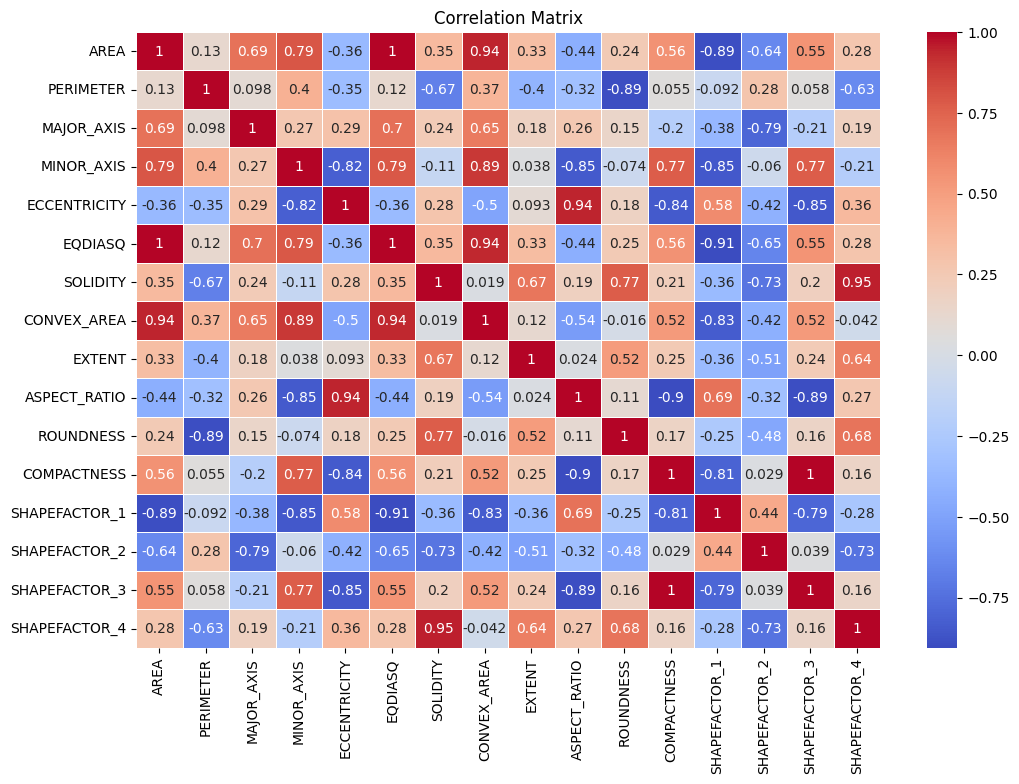

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
X = ds.drop(['Class'], axis=1)
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

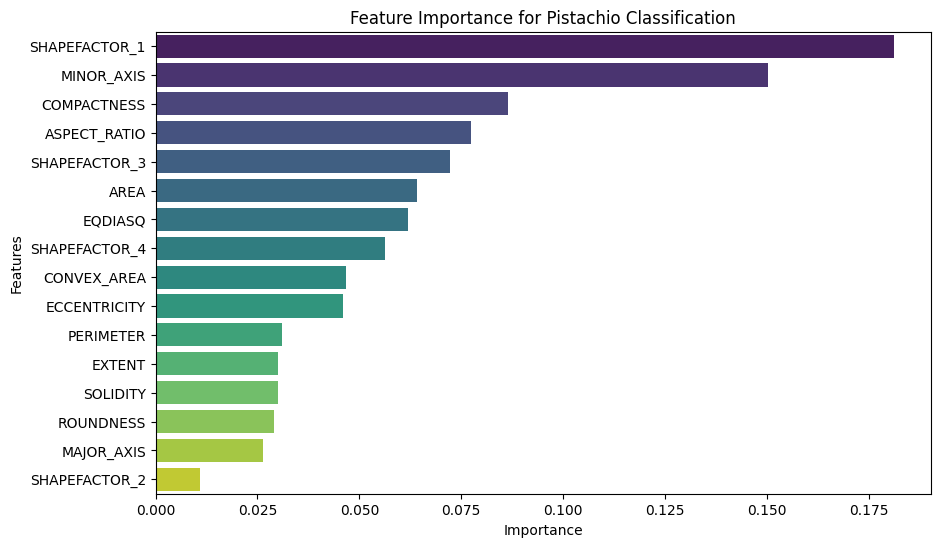

,Feature,Importance
12,SHAPEFACTOR_1,0.181197
3,MINOR_AXIS,0.150299
11,COMPACTNESS,0.086380
9,ASPECT_RATIO,0.077423
14,SHAPEFACTOR_3,0.072215


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
dsl = ds
# Encode the categorical 'Class' column to numerical labels (0 and 1)
label_encoder = LabelEncoder()
dsl['Class'] = label_encoder.fit_transform(dsl['Class'])

# Split the data into features (X) and target (y)
X = dsl.drop(columns=['Class'])
y = dsl['Class']

# Train a Random Forest model to determine feature importance
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Extract feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance for Pistachio Classification')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Display the feature importance data
feature_importances.head()

In [12]:
# Convert importances to percentages
feature_importances['Importance (%)'] = (feature_importances['Importance'] / feature_importances['Importance'].sum()) * 100

# Sort by importance percentage
feature_importances = feature_importances.sort_values(by='Importance (%)', ascending=False)

# Display the feature importances in percentage
print(feature_importances[['Feature', 'Importance (%)']])

          Feature  Importance (%)
12  SHAPEFACTOR_1       18.119742
3      MINOR_AXIS       15.029874
11    COMPACTNESS        8.637995
9    ASPECT_RATIO        7.742255
14  SHAPEFACTOR_3        7.221546
0            AREA        6.410597
5         EQDIASQ        6.197903
15  SHAPEFACTOR_4        5.633867
7     CONVEX_AREA        4.672956
4    ECCENTRICITY        4.602906
1       PERIMETER        3.105630
8          EXTENT        2.998207
6        SOLIDITY        2.993767
10      ROUNDNESS        2.912586
2      MAJOR_AXIS        2.631886
13  SHAPEFACTOR_2        1.088283


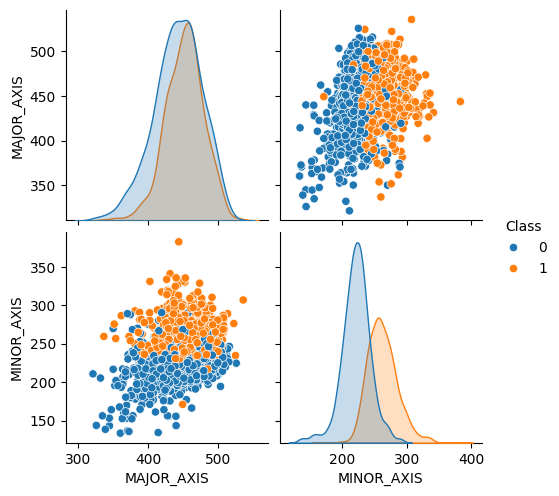

In [13]:
sns.pairplot(ds[['MAJOR_AXIS', 'MINOR_AXIS','Class']], hue='Class')
plt.show()

**MINOR_AXIS**: The length of the minor axis shows significant variation, especially for Siit_Pistachio, indicating that this class tends to have more elongated shapes compared to Kirmizi_Pistachio.

In [24]:
sns.scatterplot(x='AREA', y='PERIMETER', hue='Class', data=ds,palette='plasma')
plt.title("Scatter Plot of AREA vs PERIMETER by Class")
plt.show()

ValueError: 'palasma' is not a valid palette name

The **scatter plot** shows how the AREA and PERIMETER of the pistachios relate to each other. Siit_Pistachio and Kirmizi_Pistachio tend to cluster in different regions, indicating that these features are effective at separating the two classes. Siit_Pistachio generally has higher values for both AREA and PERIMETER, suggesting that they are larger and have a more extended perimeter.

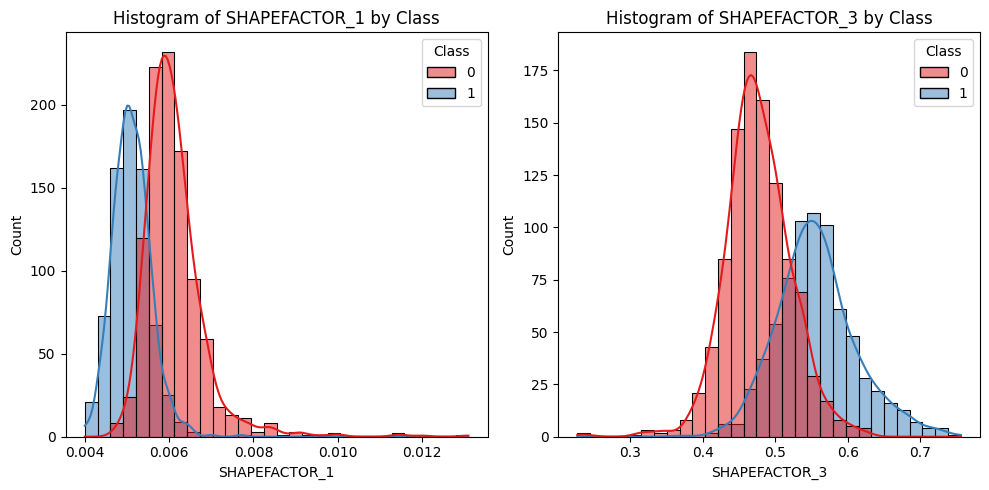

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=ds, x='SHAPEFACTOR_1', hue='Class', kde=True, palette='Set1', bins=30, ax=axes[0])
axes[0].set_title("Histogram of SHAPEFACTOR_1 by Class")

sns.histplot(data=ds, x='SHAPEFACTOR_3', hue='Class', kde=True, palette='Set1', bins=30, ax=axes[1])
axes[1].set_title("Histogram of SHAPEFACTOR_3 by Class")

plt.tight_layout()
plt.show()

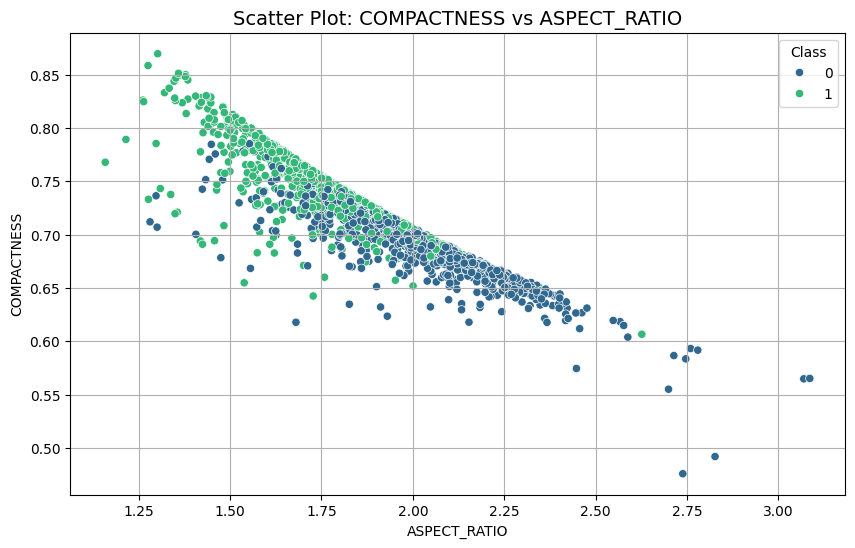

In [16]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=ds['ASPECT_RATIO'], y=ds['COMPACTNESS'], hue=ds['Class'], palette='viridis')

plt.title('Scatter Plot: COMPACTNESS vs ASPECT_RATIO', fontsize=14)
plt.xlabel('ASPECT_RATIO')
plt.ylabel('COMPACTNESS')
plt.legend(title='Class')
plt.grid(True)

plt.show()

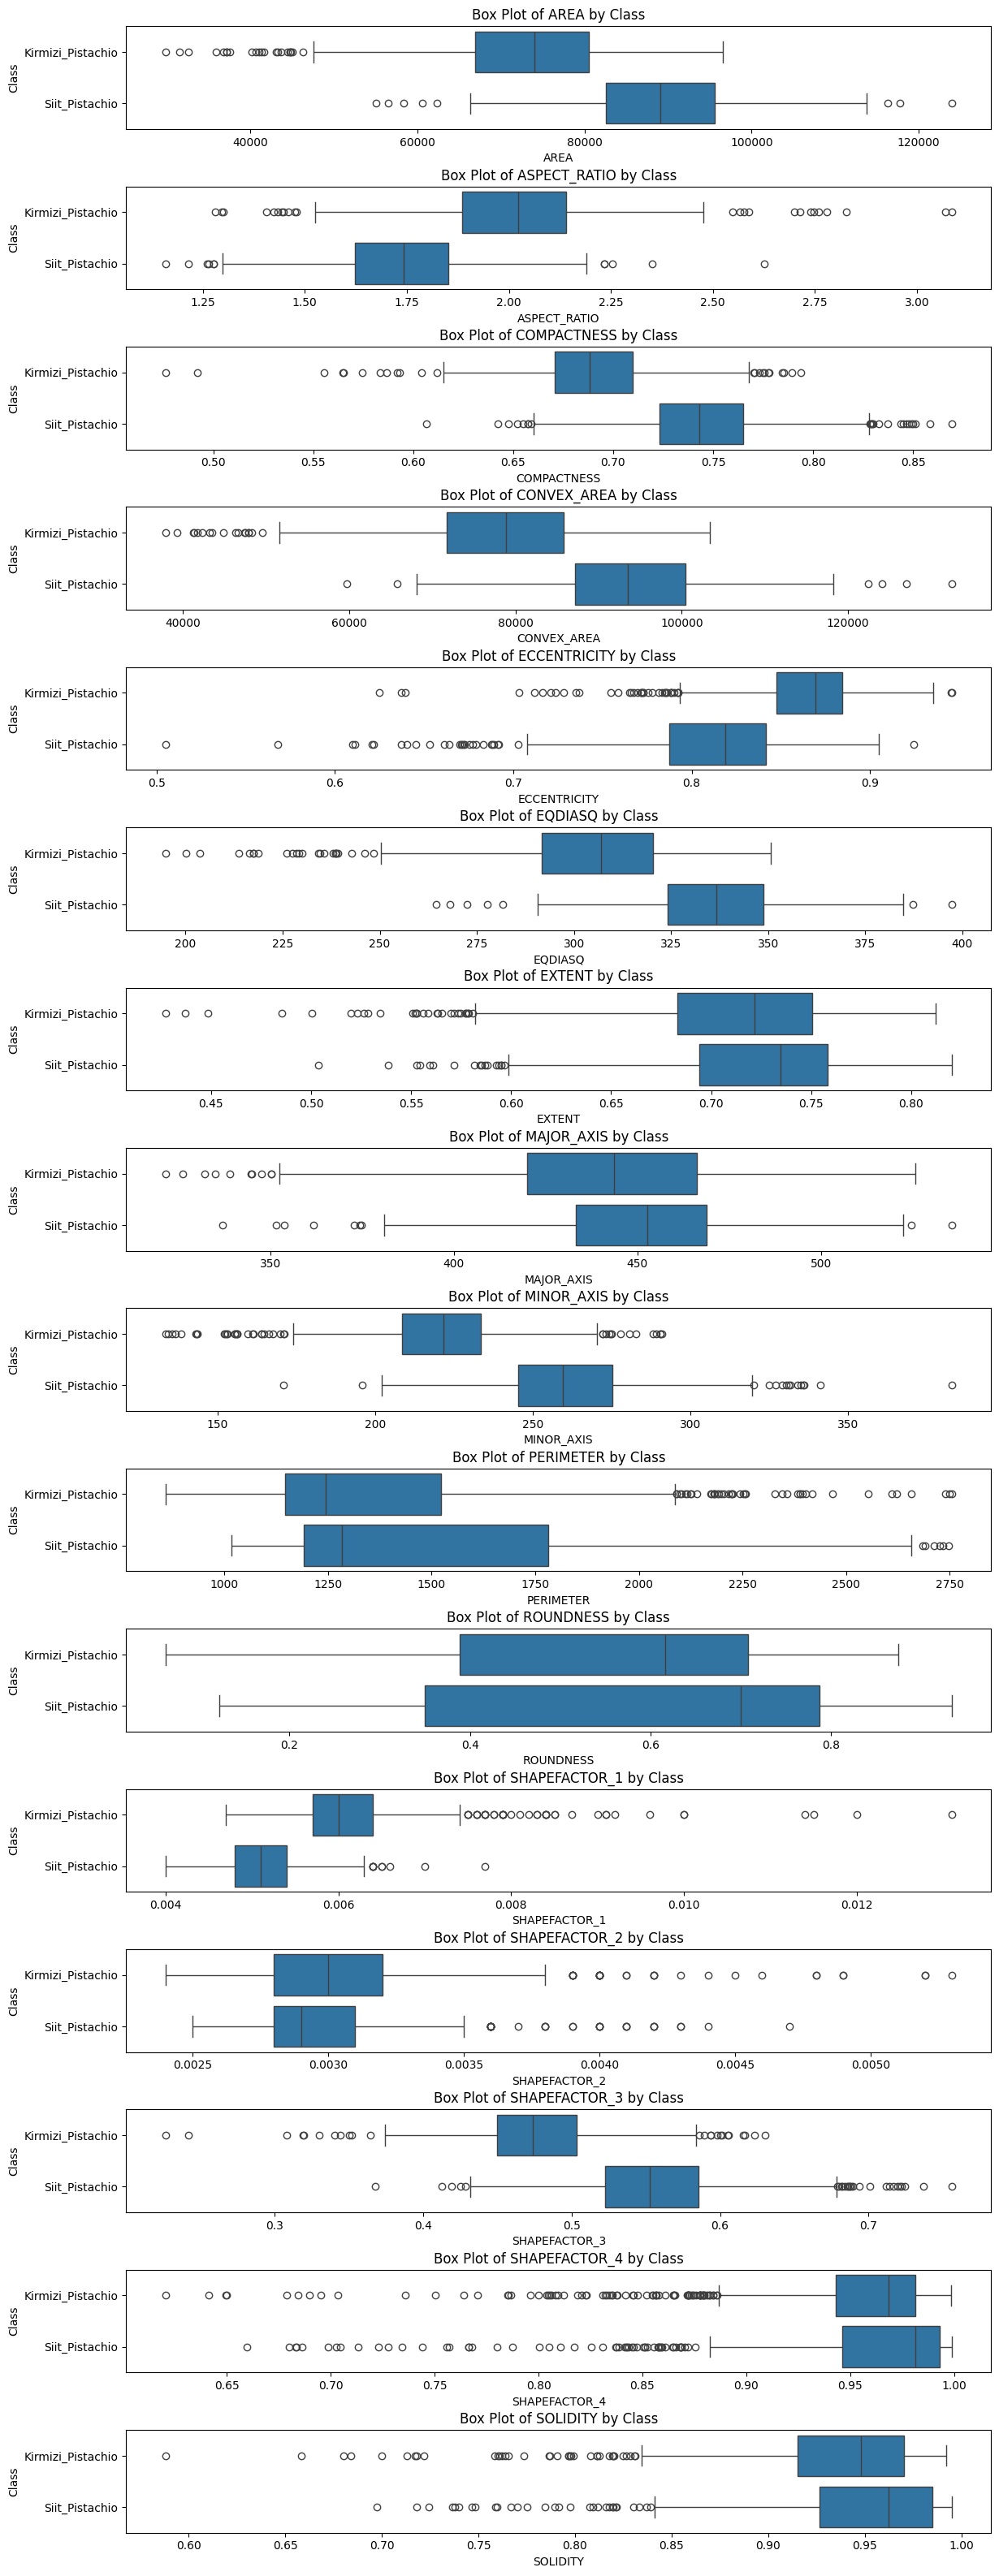

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all column names except 'Class'
columns_to_plot = ds.columns.difference(['Class'])

# Create subplots dynamically based on the number of columns
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(12, len(columns_to_plot)*2))
plt.tight_layout(pad=3.0)

# Loop through each column and plot a boxplot
for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=ds['Class'], x=ds[column], ax=axes[i])  # Set x as 'Class' and y as the feature column
    axes[i].set_title(f'Box Plot of {column} by Class')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = ds.drop('Class', axis=1)  # Features
y = ds['Class']  # Target

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1374, 16), (344, 16), (1374,), (344,))

The dataset has been preprocessed as follows:

The "Class" labels were encoded into numerical values.
The features were standardized using StandardScaler.
The data was split into training (1202 samples) and testing (516 samples) sets, with 16 features for each sample.

In [ ]:
#Fit the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Make predictions
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8837209302325582
Confusion Matrix:
 [[180  21]
 [ 19 124]]
Classification Report:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.90      0.90      0.90       201
   Siit_Pistachio       0.86      0.87      0.86       143

         accuracy                           0.88       344
        macro avg       0.88      0.88      0.88       344
     weighted avg       0.88      0.88      0.88       344



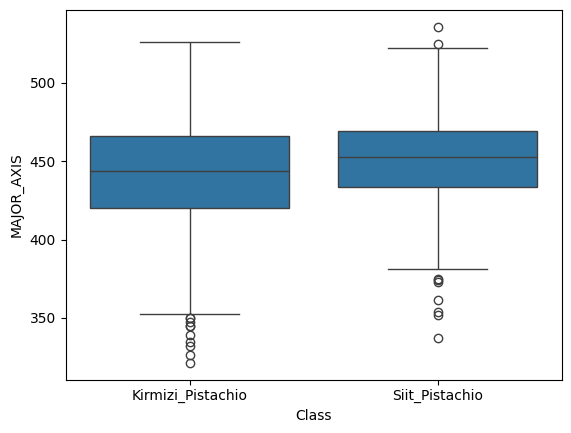

In [ ]:
sns.boxplot(x = ds['Class'], y = ds['MAJOR_AXIS'],data = ds)
plt.show()

In [ ]:
max_val = ds.MAJOR_AXIS.quantile(0.95)
min_val = ds.MAJOR_AXIS.quantile(0.05)
ds1 = ds[(ds['MAJOR_AXIS'] > min_val) & (ds['MAJOR_AXIS'] < max_val)]
print("before dataset shape:", ds.shape)
print("after removing outlier's:",ds1.shape)

before dataset shape: (1718, 17)
after removing outlier's: (1546, 17)


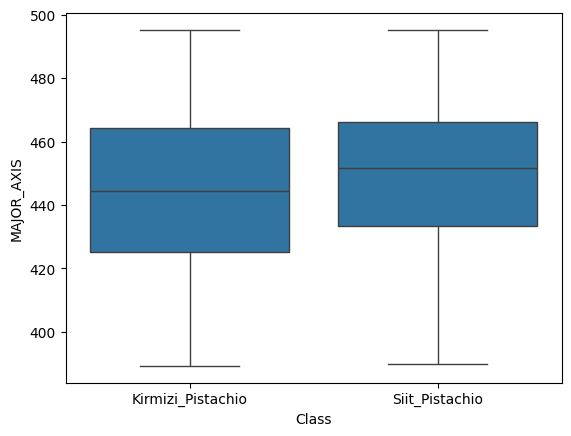

In [ ]:
sns.boxplot(x = ds1['Class'], y = ds1['MAJOR_AXIS'],data = ds1)
plt.show()

In [ ]:
X = ds1.drop('Class', axis=1)  # Features
y = ds1['Class']  # Target

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1236, 16), (310, 16), (1236,), (310,))

In [ ]:
#Fit the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Make predictions
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8774193548387097
Confusion Matrix:
 [[157  14]
 [ 24 115]]
Classification Report:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.87      0.92      0.89       171
   Siit_Pistachio       0.89      0.83      0.86       139

         accuracy                           0.88       310
        macro avg       0.88      0.87      0.88       310
     weighted avg       0.88      0.88      0.88       310



##**Insight:**
The drop in model accuracy after removing the MAJOR_AXIS outliers suggests that every column (including MAJOR_AXIS) plays an important role in maintaining the overall accuracy. Even though some features might seem to have extreme values or outliers, they could still carry important information for the model. Removing them without thorough analysis can reduce the model's ability to generalize or make accurate predictions.

##**Decision Tree Classifier:**

1. Data Split: The dataset is split into training (70%) and testing (30%) sets.

2. Model Initialization: A Decision Tree Classifier is initialized.

3. Training: The model is trained on the training data.

4. Prediction: The trained model predicts class labels on the test data.

5. This forms the basic application of a Decision Tree for classification tasks.

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = ds.drop('Class', axis=1)  # Features (all columns except 'Class')
y = ds['Class']  # Target (the 'Class' column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier()

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtree.predict(X_test)

In [ ]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.812015503875969
Confusion Matrix:
 [[266  29]
 [ 68 153]]
Classification Report:
                    precision    recall  f1-score   support

Kirmizi_Pistachio       0.80      0.90      0.85       295
   Siit_Pistachio       0.84      0.69      0.76       221

         accuracy                           0.81       516
        macro avg       0.82      0.80      0.80       516
     weighted avg       0.82      0.81      0.81       516



The application of a Decision Tree classifier resulted in a decrease in accuracy. This indicates that the model may be overfitting or unable to capture the complexity of the data. Decision Trees can struggle with noisy data or when there are many irrelevant features. Alternative models like Random Forest or Gradient Boosting, which combine multiple trees, might perform better by reducing overfitting and improving generalization.

##**Support Vector Machine (SVM):**

In [ ]:
X = ds.drop(['Class'], axis=1)
y = ds['Class']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((1374, 16), (344, 16))

In [ ]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with default hyperparameters
svc=SVC()

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7733


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.7820


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.7907


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1000.0)
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Using an SVM classifier led to a decrease in accuracy compared to other models. This suggests that SVM may not be the best fit for the dataset, possibly due to factors like feature distribution, data scaling, or the complexity of the decision boundaries. In this case, models like Decision Trees or ensemble methods might perform better as they are more flexible with non-linear data and less sensitive to feature scaling.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = ds.drop(['Class'], axis=1)
y = ds['Class']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = ds.drop('Class', axis=1)  # Features
y = ds['Class']  # Target

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape'''

'#Feature Scaling\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\nX_train.shape, X_test.shape, y_train.shape, y_test.shape'

In [35]:
#Fit the Logistic Regression model
logreg = LogisticRegression(C=10.0, max_iter=10000)
logreg.fit(X_train, y_train)

#Make predictions
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9011627906976745
Confusion Matrix:
 [[186  15]
 [ 19 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       201
           1       0.89      0.87      0.88       143

    accuracy                           0.90       344
   macro avg       0.90      0.90      0.90       344
weighted avg       0.90      0.90      0.90       344



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = ds.drop('Class', axis=1)  # Features
y = ds['Class']  # Target

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'''#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape'''

'#Feature Scaling\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\nX_train.shape, X_test.shape, y_train.shape, y_test.shape'

In [44]:
#Fit the Logistic Regression model
logreg = LogisticRegression(C=100.0, max_iter=10000)
logreg.fit(X_train, y_train)

#Make predictions
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9011627906976745
Confusion Matrix:
 [[186  15]
 [ 19 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       201
           1       0.89      0.87      0.88       143

    accuracy                           0.90       344
   macro avg       0.90      0.90      0.90       344
weighted avg       0.90      0.90      0.90       344



##Key Observations:

Logistic Regression (after tuning) has the best accuracy at 0.901, suggesting that hyperparameter tuning (e.g., using C=100.0 and max_iter=10000) was effective.

Random Forest also performs well with an accuracy of 0.88, but slightly lower than the tuned logistic regression.

Decision Tree has a lower accuracy (0.812) compared to other models, especially in detecting the second class, with a recall of only 0.69 for Siit_Pistachio.

SVM with rbf kernel and increasing C value shows improvements in accuracy, with the best accuracy being 0.791 with C=1000.

##**Final Conclusion:**
**Best Model:**

Logistic Regression with hyperparameters (C=100, max_iter=10000) achieved the highest accuracy of 0.901.

**Other Models:**

Random Forest performed well with 0.88 accuracy.
SVM maxed out at 0.791 accuracy.
Decision Tree had lower accuracy at 0.812, struggling with class imbalance.
Next Steps: Further tuning and cross-validation could improve other models, but Logistic Regression is the best for now, ready for deployment.